In [1]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers

Load Dataset

In [2]:
# Load the dataset without any predefined batch size
train_data = tf.keras.utils.image_dataset_from_directory(
    'images/train',
    labels='inferred',
    label_mode = 'int',
    batch_size = None,  # Load as unbatched dataset
    image_size = (48, 48),  # Resize images to standard size
    seed=42 
)

Found 28709 files belonging to 7 classes.


In [3]:
test_data = keras.utils.image_dataset_from_directory(
    directory = 'images/test',
    labels = 'inferred',
    label_mode = 'int',
    color_mode = 'grayscale',
    batch_size = None,
    image_size = (48, 48),
    seed=42 
)

Found 7178 files belonging to 7 classes.


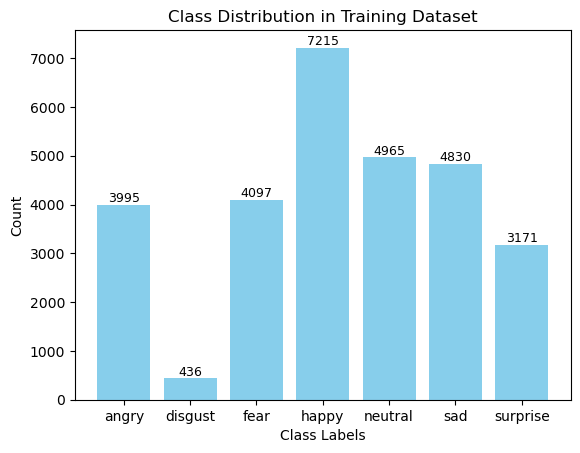

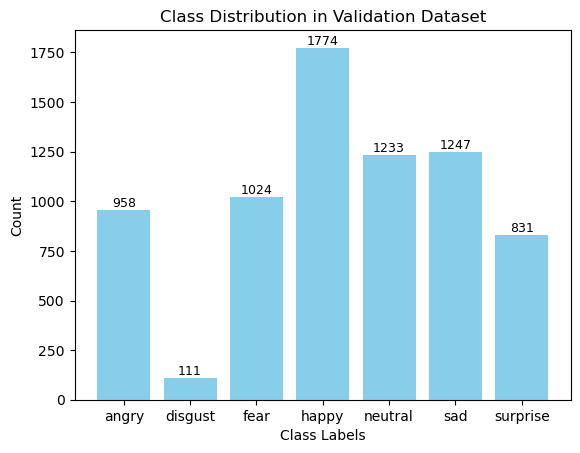

In [6]:
def plot_distribution(dataset, title, class_names):
    labels = []
    for _, label in dataset:
        labels.append(label.numpy())  # Append the scalar value
    
    unique, counts = np.unique(labels, return_counts=True)
    
    # Convert unique class indices to class names
    unique_names = [class_names[int(i)] for i in unique]
    
    # Create the bar chart
    plt.bar(unique_names, counts, color='skyblue')
    plt.xlabel("Class Labels")
    plt.ylabel("Count")
    plt.title(title)
    
    # Add text on top of each bar
    for i, count in enumerate(counts):
        plt.text(i, count + 1, str(count), ha='center', va='bottom', fontsize=9)
    
    plt.show()

# Plot initial class distribution with class names
class_names = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']
plot_distribution(train_data, "Class Distribution in Training Dataset", class_names)
plot_distribution(test_data, "Class Distribution in Validation Dataset", class_names)


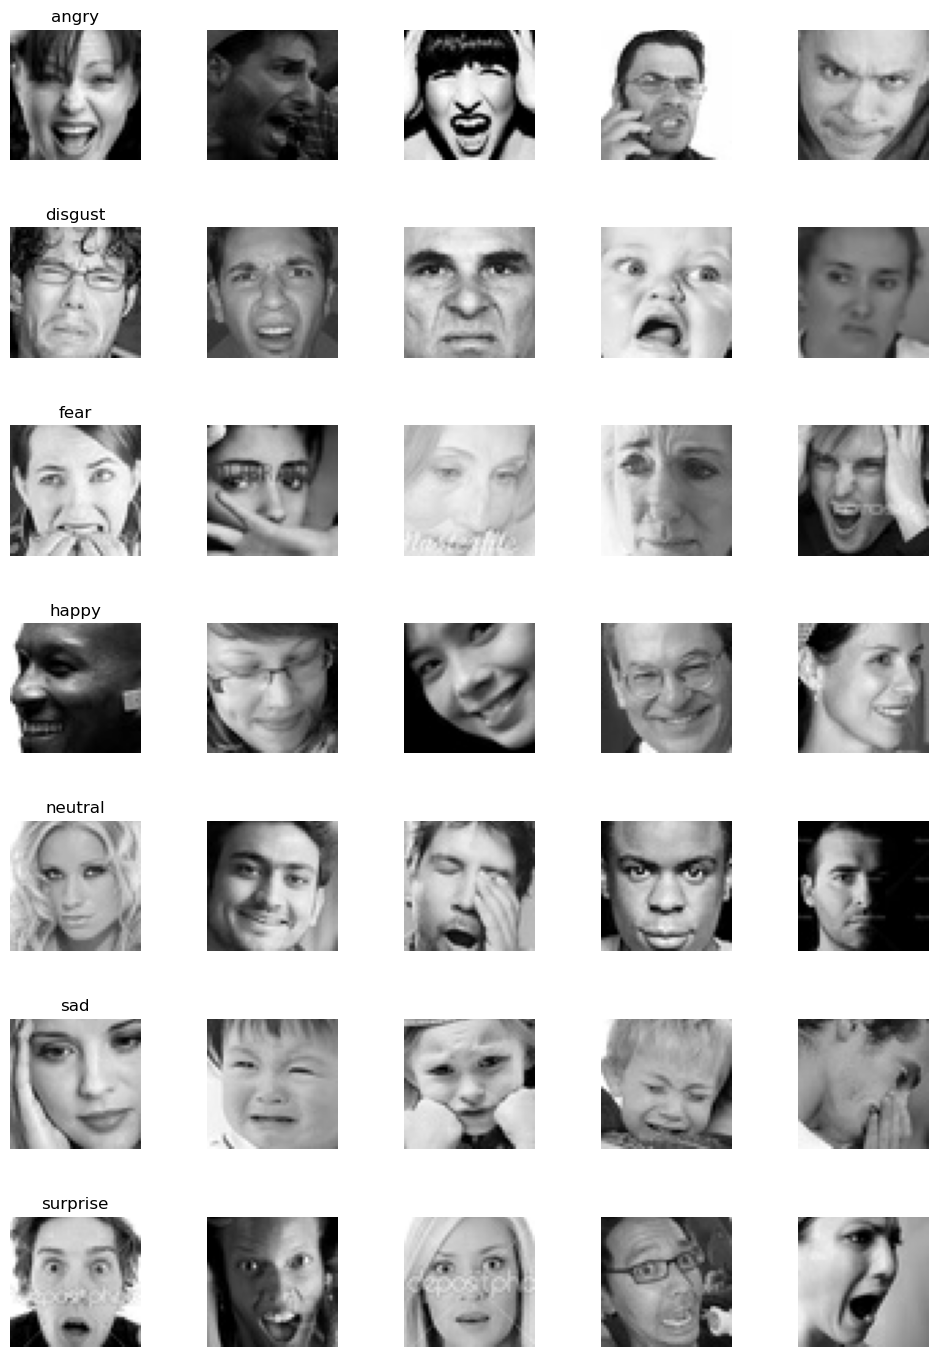

In [7]:
def plot_images_by_class(dataset, class_names, num_images_per_class=5):
    """
    Plot a few sample images for each class from the dataset.
    
    :param dataset: The dataset to sample from.
    :param class_names: List of class names corresponding to labels.
    :param num_images_per_class: Number of images to display per class.
    """
    # Create a dictionary to store images for each class
    images_by_class = {class_label: [] for class_label in range(len(class_names))}

    for image, label in dataset:
        label = label.numpy()
        if len(images_by_class[label]) < num_images_per_class:
            images_by_class[label].append(image.numpy())
        if all(len(images) == num_images_per_class for images in images_by_class.values()):
            break

    # Plot images with a smaller figure size
    fig, axs = plt.subplots(len(class_names), num_images_per_class, figsize=(10, 2 * len(class_names)))  # Reduced figsize
    fig.tight_layout()

    for class_label, images in images_by_class.items():
        for i, img in enumerate(images):
            ax = axs[class_label, i] if len(class_names) > 1 else axs[i]
            ax.imshow(img.astype("uint8"))
            ax.axis("off")
            if i == 0:
                ax.set_title(class_names[class_label])

    plt.show()

class_names = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']
plot_images_by_class(train_data, class_names)